<a href="https://colab.research.google.com/github/Anand9876/-foodyboy/blob/main/C112Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import files
data_to_upload = files.upload()

In [22]:
import csv
import pandas as pd
import plotly.express as px
import statistics

df = pd.read_csv('savings_data.csv')
fig=px.scatter(df,y='quant_saved',color='wealthy')
fig.show()


In [23]:
import csv

with open('savings_data.csv', newline='') as f:
  savings_data=list(csv.reader(f))
savings_data.pop(0)
total_entries=len(savings_data)
total_people_given_remainder=0
for data in savings_data:
  if int(data[3])==1:
    total_people_given_remainder+=1
import plotly.graph_objects as go

fig =go.Figure(go.Bar(x=['remainded','not remainded'],y=[total_people_given_remainder,(total_entries-total_people_given_remainder)]))
fig.show()

In [24]:
import statistics

all_savings=[]

for data in savings_data:
  all_savings.append(float(data[0]))
print('The mean of all_savings is :-{}'.format(statistics.mean(all_savings)))
print('The median of all_savings is :-{}'.format(statistics.median(all_savings)))
print('The mode of all_savings is :-{}'.format(statistics.mode(all_savings)))


The mean of all_savings is :-85.32780331328739
The median of all_savings is :-39.2724
The mode of all_savings is :-0.0


In [25]:
reminded=[]
not_reminded=[]

for data in savings_data:
  if int(data[3])==1:
    reminded.append(float(data[0]))
  else:
    not_reminded.append(float(data[0])) 

print('The mean of remainded  value is :-{}'.format(statistics.mean(reminded)))
print('The median of remainded value is :-{}'.format(statistics.median(reminded)))
print('The mode of reminaded value is :-{}'.format(statistics.mode(reminded)))

print('The mean of remainded value is :-{}'.format(statistics.mean(not_reminded)))
print('The median of remainded value is :-{}'.format(statistics.median(not_reminded)))
print('The mode of reaminded value is :-{}'.format(statistics.mode(not_reminded)))

The mean of remainded  value is :-78.61157672384391
The median of remainded value is :-39.2724
The mode of reminaded value is :-2.284
The mean of remainded value is :-87.22929365730847
The median of remainded value is :-39.2724
The mode of reaminded value is :-0.0


In [26]:
import statistics

print('The standard deviation of the remainded data is :-{}'.format(statistics.stdev(reminded)))
print('The standard deviation of the not_remainded data is :-{}'.format(statistics.stdev(not_reminded)))
print('The standard deviation of all_savings of the data is :-{}'.format(statistics.stdev(all_savings)))

The standard deviation of the remainded data is :-164.58072141099734
The standard deviation of the not_remainded data is :-204.91519933877308
The standard deviation of all_savings of the data is :-196.75453011909315


I just have imported the savings_data_final to find the correlation between quant_saved and age

In [27]:
from google.colab import files
data_to_upload=files.upload()

In [28]:
import numpy as np

with open('savings_data_final.csv', newline='') as f:
  reader=csv.reader(f)
  savings_data=list(reader)
savings_data.pop(0)

age=[]
savings=[]

for data in savings_data:
  if float(data[5])!=0:
    age.append(float(data[5]))
    savings.append(float(data[0]))
correlation=np.corrcoef(age,savings)
print(correlation[0,1])





0.03663447975985462


In [29]:
import plotly.figure_factory as ff
fig=ff.create_distplot([df['quant_saved'].tolist()],['savings'],show_hist=False)
fig.show()

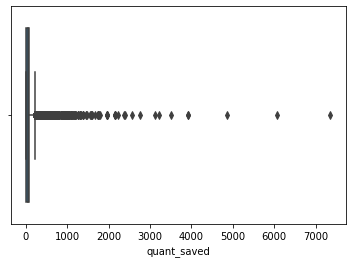

In [30]:
import seaborn as sns

sns.boxplot(data=df,x=df['quant_saved'])


In [31]:
q1=df['quant_saved'].quantile(0.25)
q3=df['quant_saved'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)


2.284 86.514 84.22999999999999


In [32]:
lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr
print(lower_whisker,upper_whisker)

-124.06099999999998 212.85899999999998


In [47]:
df = pd.read_csv("savings_data_final.csv")
new_df=df[df['quant_saved']<upper_whisker]
print(new_df)

       quant_saved  female  highschool_completed  rem_any  wealthy        age
0          13.0908       1                     0        1        0  28.000000
1          39.2724       0                     1        1        1   0.000000
3          58.9086       1                     1        1        1   0.000000
4          78.5448       1                     1        1        1   0.000000
5          39.2724       1                     1        1        1  43.000000
...            ...     ...                   ...      ...      ...        ...
13555     129.7710       1                     1        0        0  26.419178
13556       0.0000       1                     1        0        0  29.306849
13557     173.0280       0                     0        1        0  28.117807
13558       8.6514       0                     0        0        0  28.561644
13559      79.3045       1                     1        1        0  35.317810

[12378 rows x 6 columns]


C113 and Data Story-2


In [48]:
new_df=df[df['quant_saved']<upper_whisker]
all_savings = new_df['quant_saved'].tolist()

print('Mean of savings:- {}'.format(statistics.mean(all_savings)))
print('Median of savings:- {}'.format(statistics.median(all_savings)))
print('Mode of savings:- {}'.format(statistics.mode(all_savings)))
print('Standard deviation of savings:- {}'.format)

fig=ff.create_distplot([new_df['quant_saved'].tolist()],['Savings'],show_hist=False)
fig.show()


Mean of savings:- 46.20051938981879
Median of savings:- 36.0475
Mode of savings:- 0.0
<built-in method format of str object at 0x7f9795fbad50>


In [49]:
import random
import plotly.graph_objects as go

sampling_mean_list=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling=statistics.mean(sampling_mean_list)

fig=ff.create_distplot([sampling_mean_list],['Savings'],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode='lines',name='MEAN'))
fig.show()

In [40]:
print('Standard deviation of the sampling data:-{}'.format(statistics.stdev(sampling_mean_list)))


Standard deviation of the sampling data:-5.173680844529951


In [44]:
print('Mean of population:-{}'.format(statistics.mean(all_savings)))
print('Mean of sampling distribution:-{}'.format(mean_sampling))

Mean of population:-46.20051938981879
Mean of sampling distribution:-46.13811667910631


In [51]:
temp_df=new_df[new_df.age  !=0]
age =temp_df['age'].tolist()
savings=temp_df['quant_saved'].tolist()

correlation=np.corrcoef(age,savings)
print('Correlation between the age and the savings is :-{}'.format(correlation[0,1]))


Correlation between the age and the savings is :-0.08561544120342092


In [52]:
reminded_df=new_df.loc[new_df['rem_any']==1]
not_reminded_df=new_df.loc[new_df['rem_any']==0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


In [54]:
fig=ff.create_distplot([not_reminded_df['quant_saved'].tolist()],['Savings of not reminded'],show_hist=False)
fig.show()

In [63]:
not_reminded_savings=not_reminded_df['quant_saved'].tolist()

sampling_mean_list_not_reminded=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))
mean_sampling_not_reminded=statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded=statistics.stdev(sampling_mean_list_not_reminded)
print('mean of the sampling data which is not reminded:-',mean_sampling_not_reminded)
print('Standard deviationof the sampling data which is not reminded is:-',stdev_sampling_not_reminded)
fig = ff.create_distplot([sampling_mean_list_not_reminded],['Savings(not_reminded)'],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.1],mode='lines',name='MEAN'))
fig.show()

mean of the sampling data which is not reminded:- 43.70633495589637
Standard deviationof the sampling data which is not reminded is:- 5.02536664678734


In [64]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 38.680968309109026 and First (end) - 48.73170160268371
Second (start) - 33.655601662321686 and Second (end) - 53.75706824947105
Third (start) - 28.630235015534346 and Third (end) - 58.78243489625839


In [66]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Reminded) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Reminded) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Reminded) -> 48.0236935306542
Standard Deviation of Sampling (Reminded) -> 5.139558210449362


In [68]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")

Z-Score is - 0.8591131509813063
